<a href="https://colab.research.google.com/github/sfarias03/Homelessness-Data-Methodologies/blob/main/SF_Homelessness_Analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In our project, we will use data science methodology to study homelessness in the United States. Our motivation comes from the HUD study's goals of understanding the key factors that contribute to homelessness at the community level. HUD's objectives are: (1) to identify market factors that have a significant impact on homelessness, and (2) to create and evaluate empirical models that can accurately represent and predict homelessness in communities. We will explore if there are better modeling approaches than those described in the HUD report. Our project aims to provide valuable insights to support ongoing efforts to end and prevent homelessness in the U.S.

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn import preprocessing

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

import plotly.offline as pyo
import plotly.graph_objs as go

# Model preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import RobustScaler

# Train-test splits and cross validation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV

# Models
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Ridge, Lasso

# Model metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Train-test splits and cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from scipy.stats import uniform, randint
import xgboost as xgb

# Model metrics and analysis
from sklearn.metrics import  mean_squared_error, mean_absolute_error

# plot tree model
import graphviz


## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sfarias03/Homelessness-Data-Methodologies/main/clean_homelessness_data-2.csv')

## State your questions

The overall problem is to determine whether and how housing market factors are related to homelessness.

We are investigating the potential of incorporating interactions among predictor variables to develop an effective model for predicting rates of homelessness.

 Our specific investigation aims to determine the effectiveness of incorporating regional differences and interactions between a geographical region variable and other predictor variables in predicting rates of homelessness. By exploring these factors, we seek to develop a model that accurately predicts homelessness rates. 

## Analysis

### Full linear regression model

In [3]:
variable_remove = ["total_sheltered", "total_unsheltered", "total_black", 
                   "total_latino_hispanic", "total_asian", "total_pacific_islander", 
                   "total_population_0_19", "total_population_65_plus", "total_female_population", 
                   "year", "rate_unsheltered", "rate_sheltered"]

In [4]:
df = df.drop(columns = variable_remove)

In [5]:
X = df[df.columns.difference(['coc_number', 'rate_homeless', "total_population", "total_homeless"])]

In [6]:
y = df['rate_homeless']

In [7]:
X.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,census_region,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,...,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
0,99.000000,13.800000,60.799999,4,1,42.010002,0,11.743647,2.438863,8.751520,...,0.366995,65.634148,4.117406,39.727921,23.379078,14.535126,0,1.710000,16.500000,8.500000
1,99.000000,13.800000,60.799999,4,0,40.675701,0,9.042710,2.249699,9.972870,...,2.236410,75.560379,9.294898,33.922234,19.786558,14.142518,0,1.710000,16.500000,14.607715
2,95.083710,50.995346,80.874313,3,0,47.633533,0,-0.852477,1.862248,9.318163,...,7.191579,65.983711,1.235925,31.769621,32.077599,9.149558,1,6.669876,38.593376,19.492331
3,87.000801,57.893360,81.939949,3,1,46.713249,0,-8.507004,1.858394,8.709522,...,3.681716,74.543457,1.712736,32.109203,33.668129,11.647923,0,12.296666,58.519012,18.899839
4,95.178665,48.382103,79.429985,3,0,45.165546,0,0.751167,1.362010,8.967195,...,5.150007,82.332657,1.539988,27.708206,27.959316,9.135015,0,5.462999,44.778618,18.803186


In [8]:
X.columns

Index(['HUD_unit_occupancy_rate', 'average_Jan_temperature',
       'average_summer_temperature', 'census_region', 'city_or_urban',
       'gini_coefficient_2016', 'high_housing_density',
       'house_price_index_2009', 'log_median_rent',
       'medicare_reimbursements_per_enrollee', 'migration_4_year_change',
       'net_migration', 'number_eviction', 'percent_asian', 'percent_black',
       'percent_female_population', 'percent_latino_hispanic',
       'percent_pacific_islander', 'percent_population_0_19',
       'percent_population_65_plus', 'percentage_excessive_drinking',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'poverty_rate',
       'proportion_one_person_households', 'rate_unemployment',
       'rental_vacancy_rate', 'share_HUD_units', 'share_built_before_1940',
       'share_no_bachelors', 'share_overcrowded_units_2016',
       'share_renters_2016', 'share_under_18_with_single_parent',
       'share_veteran_status', 's

## Fit models on the full data set

Center the variables using the median and scale with the inter-quartile range. Define the scaler using only the training data. For the validation set approach to work, we can not incorporate any knowledge of the validation set's properties into the model building process.

In [9]:
scaler = RobustScaler().fit(X)

Perform the scaling transform on the predictors

In [10]:
X = pd.DataFrame(data=scaler.transform(X), columns=X.columns.values, index=X.index)

Fit a multiple linear regression model using all of the predictors and view the statistical significance of the coefficients. How many are statistically significant?

In [11]:
X.head()

,HUD_unit_occupancy_rate,average_Jan_temperature,average_summer_temperature,census_region,city_or_urban,gini_coefficient_2016,high_housing_density,house_price_index_2009,log_median_rent,medicare_reimbursements_per_enrollee,...,share_built_before_1940,share_no_bachelors,share_overcrowded_units_2016,share_renters_2016,share_under_18_with_single_parent,share_veteran_status,suburban,total_Jan_precipitation,total_annual_precipitation,utility_costs
0,1.231444,-1.463615,-1.717155,1.0,1.0,-1.031560,0.0,0.534896,1.128996,-0.593229,...,-0.651757,-0.350919,1.347742,0.557477,-0.169425,1.429165,0.0,-0.751095,-1.970461,-1.537013
1,1.231444,-1.463615,-1.717155,1.0,0.0,-1.436983,0.0,0.367384,0.661854,0.174542,...,-0.524037,0.378822,4.712889,0.035500,-0.596108,1.303447,0.0,-0.751095,-1.970461,-0.086112
2,0.427662,0.835357,0.671251,0.0,0.0,0.677134,0.0,-0.246315,-0.294961,-0.237023,...,-0.185495,-0.325220,-0.525097,-0.158037,0.863695,-0.295369,1.0,1.472988,0.001087,1.074238
3,-1.231280,1.261710,0.798039,0.0,1.0,0.397508,0.0,-0.721048,-0.304478,-0.619630,...,-0.425292,0.304061,-0.215191,-0.127506,1.052602,0.504642,0.0,3.996126,1.779192,0.933491
4,0.447151,0.673838,0.499408,0.0,0.0,-0.072757,0.0,-0.146857,-1.530302,-0.457651,...,-0.324977,0.876695,-0.327469,-0.523191,0.374568,-0.300026,0.0,0.931806,0.553040,0.910531


### Fit the model

Fit the model.

In [12]:
model = sm.OLS(y, sm.add_constant(X)).fit()

Print the summary

In [13]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          rate_homeless   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.554
Method:                 Least Squares   F-statistic:                     13.18
Date:                Wed, 24 May 2023   Prob (F-statistic):           1.46e-46
Time:                        19:21:44   Log-Likelihood:                -1384.7
No. Observations:                 374   AIC:                             2847.
Df Residuals:                     335   BIC:                             3001.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

Display the predictor name and the p-value of the estimated coefficient.

In [14]:
variables = X.columns
variables = np.insert(variables, 0, 'intercept')

results = pd.DataFrame(index = variables, 
             data = {'p-value':model.pvalues.values.round(3), 
                     'significant':model.pvalues.values < 0.05,
                     'coefficient':model.params.values.round(2),
                     'abs_coefficient':np.abs(model.params.values.round(2))})

results.sort_values(by = 'abs_coefficient', ascending=False)

,p-value,significant,coefficient,abs_coefficient
intercept,0.000,True,17.55,17.55
log_median_rent,0.002,True,9.10,9.10
proportion_one_person_households,0.001,True,6.02,6.02
share_HUD_units,0.000,True,5.07,5.07
percent_black,0.004,True,-5.06,5.06
census_region,0.000,True,4.78,4.78
share_built_before_1940,0.032,True,3.60,3.60
poverty_rate,0.181,False,-3.38,3.38
suburban,0.135,False,-2.95,2.95
share_overcrowded_units_2016,0.033,True,2.65,2.65


In [15]:
X.shape

(374, 38)

The model has too many variables, indicating potential overfitting. We will use regularization and dimensionality reduction techniques to build a simpler and more effective model.

Use the model to predict the test data. Compute the MSE, RMSE, and $R^2$.

In [16]:
y_pred_lr = model.predict(sm.add_constant(X))

In [17]:
MSE = mean_squared_error(y, y_pred_lr)
RMSE = np.sqrt(MSE)
R_squared = r2_score(y, y_pred_lr)

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), ' R-squared =', R_squared.round(3))

MSE = 96.269  RMSE = 9.812  R-squared = 0.599


In [18]:
mean_absolute_error(y, y_pred_lr)

6.630591440788854

Plot the values of y vs. the predicted values

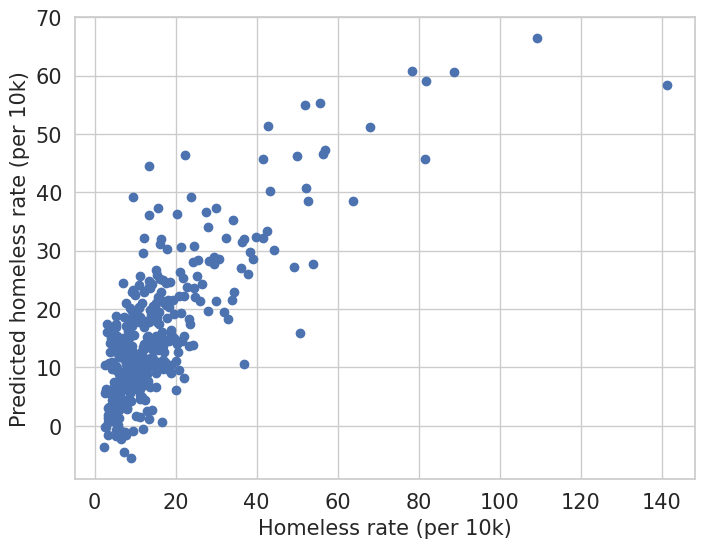

In [19]:
plt.figure(figsize = (8,6))

plt.plot(y, y_pred_lr, 'o');

plt.xlabel('Homeless rate (per 10k)', fontsize = 15)
plt.ylabel('Predicted homeless rate (per 10k)', fontsize = 15)

plt.tick_params(labelsize = 15)

This difference suggests that the model or analysis being used to predict the homeless rate may not be accurately capturing or accounting for the factors influencing homelessness in the given context. It could indicate that the model is underestimating the extent of homelessness or failing to consider certain variables that contribute to homelessness. To account for this we'll be doing a Train Test Split. It can provide insights into the model's ability to capture the underlying patterns and dynamics of homelessness. It allows you to assess whether the model's predictions hold up on unseen data, indicating its reliability in estimating the homeless rate in real-world scenarios.

### Train Test Split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state = 9)

In [21]:
print(X_train.shape, np.round(X_train.shape[0]/X_train.shape[1]))

(299, 38) 8.0


In [22]:
scaler = RobustScaler().fit(X_train)

In [23]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()

Display the predictor name and the p-value of the estimated coefficient.

In [25]:
variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(index = variables, data = {'p-value':model.pvalues.values.round(3), 'significant': model.pvalues.values < 0.05})

,p-value,significant
intercept,0.000,True
HUD_unit_occupancy_rate,0.227,False
average_Jan_temperature,0.704,False
average_summer_temperature,0.986,False
census_region,0.000,True
city_or_urban,0.577,False
gini_coefficient_2016,0.432,False
high_housing_density,0.329,False
house_price_index_2009,0.484,False
log_median_rent,0.004,True


#####  Use the model to predict the test data. Compute the MSE, RMSE, and $R^2$.

In [26]:
MSE = mean_squared_error(y_test, model.predict(sm.add_constant(X_test)))
RMSE = np.sqrt(MSE)
R_squared = r2_score(y_test, model.predict(sm.add_constant(X_test)))

print('MSE =', MSE.round(3), ' RMSE =', RMSE.round(3), ' R-squared =', R_squared.round(3))

MSE = 138.358  RMSE = 11.763  R-squared = 0.338


### Lasso

Create an array of possible $\alpha$ values.

In [27]:
alphas = 10**np.linspace(-4,0,10)

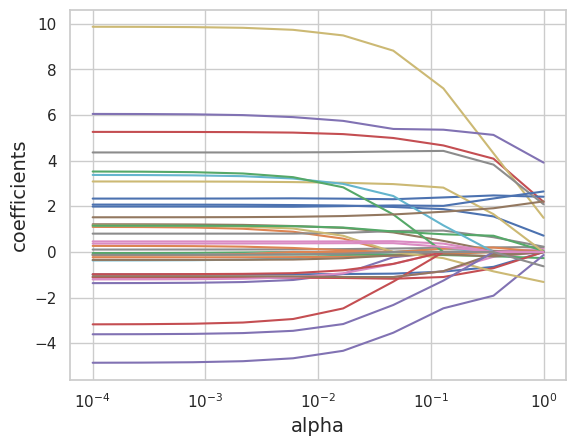

In [28]:
lasso = Lasso(max_iter = 100000)
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

Do 5-fold cross validation to find $\alpha$

In [29]:
lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)

In [30]:
lassocv.fit(X_train, y_train)
lassocv.alpha_

0.1773590063969435

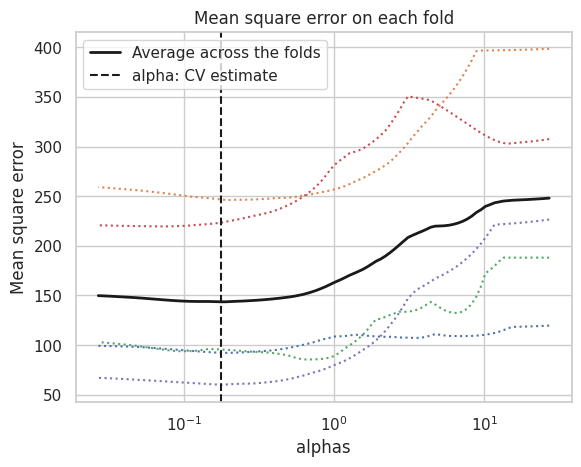

In [31]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, ":")
plt.plot(
    lassocv.alphas_ ,
    lassocv.mse_path_.mean(axis=-1),
    "k",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(
    lassocv.alpha_, linestyle="--", color="k", label="alpha: CV estimate"
)

plt.legend()
plt.xlabel("alphas")
plt.ylabel("Mean square error")
plt.title("Mean square error on each fold")
plt.axis("tight");

Fit the Lasso model on the training data with the best $\alpha$ and examine the coefficients.

In [32]:
lasso_reg = Lasso(alpha = lassocv.alpha_).fit(X_train, y_train)

In [33]:
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(4))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients.round(2), index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,15.64
HUD_unit_occupancy_rate,-0.84
average_Jan_temperature,0.00
average_summer_temperature,-0.00
census_region,4.57
city_or_urban,-0.00
gini_coefficient_2016,0.30
high_housing_density,-0.70
house_price_index_2009,0.90
log_median_rent,6.13


Use the lasso model to predict the test data. Compute the MSE, RMSE, and $R^2$.

In [34]:
MSE_lasso = mean_squared_error(y_test, lasso_reg.predict(X_test))
RMSE_lasso = np.sqrt(MSE_lasso)
R_squared_lasso = r2_score(y_test, lasso_reg.predict(X_test))

print('MSE =', MSE_lasso.round(3), ' RMSE =', RMSE_lasso.round(3), ' R-squared =', R_squared_lasso.round(3))

MSE = 123.138  RMSE = 11.097  R-squared = 0.411


Make a scatter plot

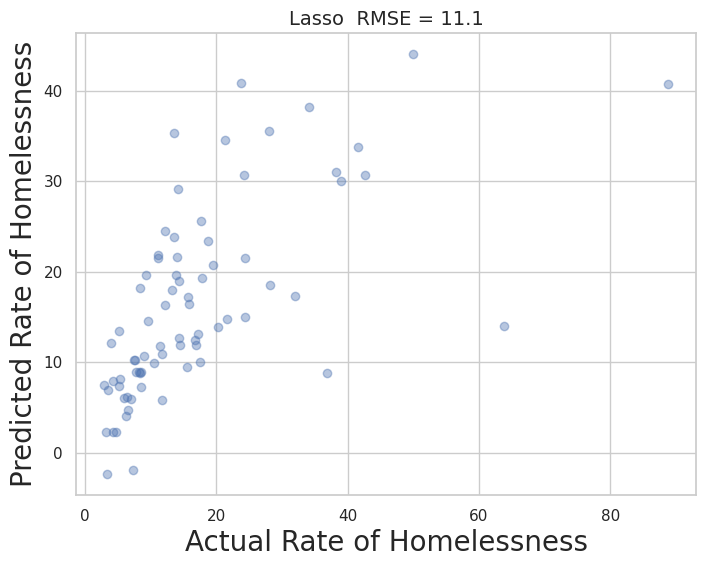

In [35]:
plt.figure(figsize=(8,6))

plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4)

plt.xlabel('Actual Rate of Homelessness',fontsize = 20)
plt.ylabel('Predicted Rate of Homelessness',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14);

### Ridge regression

Create an array of possible $\alpha$ values.

In [36]:
alphas = 10**np.linspace(-3,5,20)

To understand how $\alpha$ changes the fit, note that when $\alpha$ increases, all coefficients are scaled to be smaller.

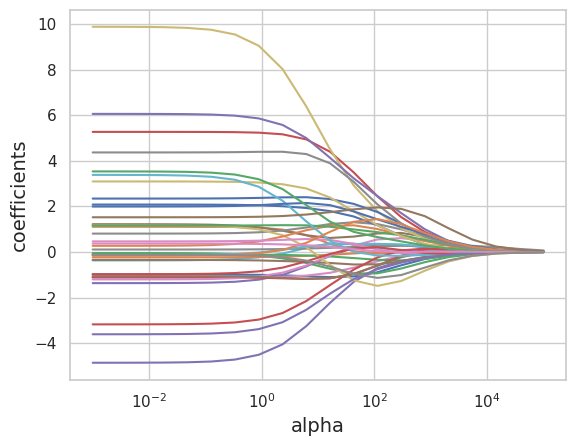

In [37]:
ridge = Ridge(max_iter = 100000)
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha', fontsize = 14)
plt.ylabel('coefficients', fontsize = 14);

Use cross-validation to find the best alpha for Ridge regression.

Do 5-fold cross validation 

In [38]:
ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')

ridgecv.fit(X_train, y_train);

Print the best $\alpha$

In [39]:
ridgecv.alpha_

16.23776739188721

Fit the ridge regression model on the training data with the best $\alpha$ and examine the coefficients.

In [40]:
ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(X_train, y_train)

In [41]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,16.030
HUD_unit_occupancy_rate,-1.104
average_Jan_temperature,0.357
average_summer_temperature,-0.738
census_region,4.395
city_or_urban,-0.170
gini_coefficient_2016,0.614
high_housing_density,-0.914
house_price_index_2009,1.223
log_median_rent,4.505


Use the ridge regression model to predict the test data. Compute the MSE, RMSE, and $R^2$.

In [42]:
MSE_ridge = mean_squared_error(y_test, ridge_reg.predict(X_test))
RMSE_ridge = np.sqrt(MSE_ridge)
R_squared_ridge = r2_score(y_test, ridge_reg.predict(X_test))

print('MSE =', MSE_ridge.round(3), ' RMSE =', RMSE_ridge.round(3), ' R-squared =', R_squared_ridge.round(3))

MSE = 133.514  RMSE = 11.555  R-squared = 0.361


Make a scatter plot

Text(0.5, 1.0, 'Lasso  RMSE = 11.1')

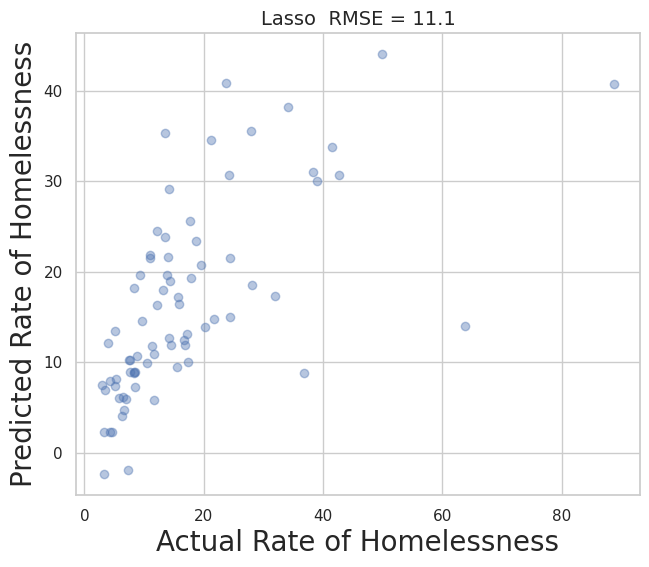

In [43]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.plot(y_test, lasso_reg.predict(X_test),'o', alpha = 0.4)
plt.xlabel('Actual Rate of Homelessness',fontsize = 20)
plt.ylabel('Predicted Rate of Homelessness',fontsize = 20)
plt.title('Lasso' + ' ' + ' RMSE = ' + str(RMSE_lasso.round(2)),fontsize = 14)

# XGBoost

XGBoost is short for eXtreme Gradient Boosting.

In [44]:
xgb_model = xgb.XGBRegressor(objective="reg:squarederror")

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

search = RandomizedSearchCV(xgb_model, param_distributions=params, n_iter=200, cv=5, verbose=1, n_jobs=1, return_train_score=True, scoring = 'neg_mean_squared_error')

search.fit(X_train, y_train)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2fd03e8d30>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2fd02f12a0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f2fd02f1060>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7f2fd02f11b0>},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

Create an XGBoost model with the best parameters

In [45]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")

In [46]:
model_xgb.set_params(**search.best_params_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9036738369443513, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2590687174474603, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.11236157958838391, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=134, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Fit the model on the training data

In [47]:
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9036738369443513, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.2590687174474603, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.11236157958838391, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=134, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

Predict the test data

In [48]:
y_pred_xgb = model_xgb.predict(X_test)

Plot the test values of `y` vs. the predicted values

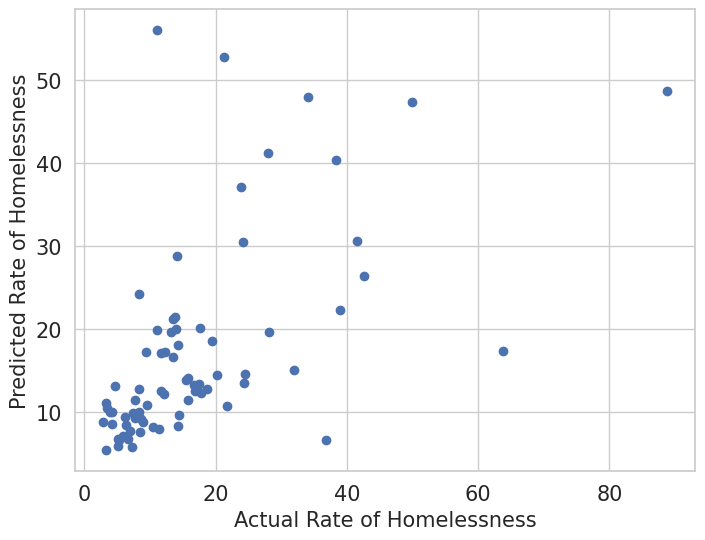

In [49]:
plt.figure(figsize = (8,6))

plt.plot(y_test, y_pred_xgb, 'o');

plt.xlabel('Actual Rate of Homelessness', fontsize = 15)
plt.ylabel('Predicted Rate of Homelessness', fontsize = 15)

plt.tick_params(labelsize = 15)

Compute the RMSE

In [50]:
mean_squared_error(y_test, y_pred_xgb, squared = False).round(3)

12.214

Compute the mean absolute error

In [51]:
mean_absolute_error(y_test, y_pred_xgb).round(3)

7.687

Plot the variable importances for the XGBoost model.

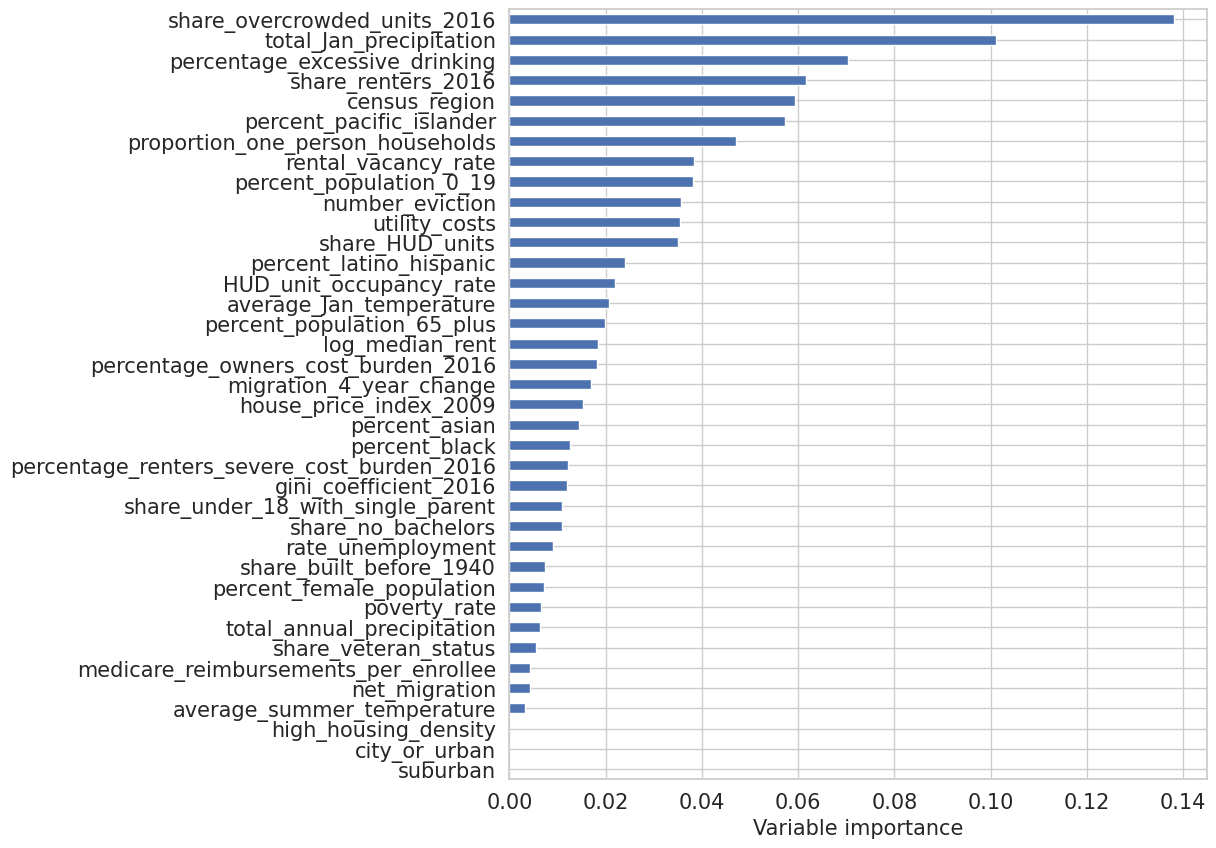

In [52]:
(pd.DataFrame(dict(cols=X.columns, imp=model_xgb.feature_importances_)).
 sort_values(by = 'imp').
 plot('cols', 'imp', 'barh', legend = False, figsize = (9,10)))

plt.ylabel('')
plt.xlabel('Variable importance', fontsize = 15)

plt.tick_params(labelsize = 15);

Comparing the RMSE and MAE (Mean Absolute Error) values, we can see that the Lasso regression has the lowest RMSE of 11.097, followed by the Ridge regression with an RMSE of 11.555, and the XGBoost model has the highest RMSE of 12.943. Lower values of RMSE and MAE indicate better model performance, as they indicate smaller prediction errors. Based on these metrics, the Lasso regression model appears to have the best performance among the three models, as it has the lowest RMSE and the highest R-squared. 

### Train/Test Split for Additional Question

In [53]:
from patsy import dmatrices

In [54]:
predictor_names = [
       'house_price_index_2009', 'log_median_rent', 'utility_costs',
       'percentage_owners_cost_burden_2016',
       'percentage_renters_severe_cost_burden_2016', 'share_renters_2016',
       'rental_vacancy_rate', 'high_housing_density', 'number_eviction',
       'share_overcrowded_units_2016', 'city_or_urban', 'suburban',
       'rate_unemployment', 'gini_coefficient_2016', 'poverty_rate',
       'share_HUD_units', 'HUD_unit_occupancy_rate', 'share_built_before_1940',
       'net_migration', 'migration_4_year_change',
       'proportion_one_person_households', 'share_under_18_with_single_parent',
       'share_veteran_status', 'share_no_bachelors',
       'medicare_reimbursements_per_enrollee', 'percentage_excessive_drinking',
       'average_Jan_temperature', 'average_summer_temperature',
       'total_Jan_precipitation', 'total_annual_precipitation', 'percent_black',
       'percent_latino_hispanic', 'percent_asian', 'percent_pacific_islander',
       'percent_population_0_19', 'percent_population_65_plus',
       'percent_female_population']

y2, X2 = dmatrices(f'rate_homeless ~ ({" + ".join(predictor_names)}) * C(census_region)', data=df)

In [55]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state = 12)

#### Building a Lasso Regression Model with Cross Validation



In [56]:
from sklearn.model_selection import LeaveOneOut

In [57]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

In [58]:
# Initialize a list to record the RMSE
lasso_tree_rmse = []

# Create the model object
model = tree.DecisionTreeRegressor()

# Create the leave one out object
loo = LeaveOneOut()

# Loop over all splits
for train_index, test_index in loo.split(X):

    x_train2 = X.iloc[train_index,:]
    y_train2 = y.iloc[train_index]

    x_test2 = X.iloc[test_index,:]
    y_test2 = y.iloc[test_index]

    # Do the cross validation
    lassocv = LassoCV(alphas = None, cv = 5, max_iter = 100_000)
    lassocv.fit(x_train2, y_train2)
    lassocv.alpha_
    
    # Get the best value of alpha
    lasso_reg = Lasso(alpha = lassocv.alpha_).fit(x_train2, y_train2)

    # Predict the left out value
    lasso_y_prediction = lasso_reg.predict(x_test2)

    # Record the RMSE
    lasso_tree_rmse.append(mean_squared_error(y_test2, lasso_y_prediction, squared=False))

In [59]:
coefficients = lasso_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, lasso_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,14.404
HUD_unit_occupancy_rate,-0.418
average_Jan_temperature,0.000
average_summer_temperature,0.000
census_region,3.532
city_or_urban,0.000
gini_coefficient_2016,0.000
high_housing_density,-0.316
house_price_index_2009,0.552
log_median_rent,5.204


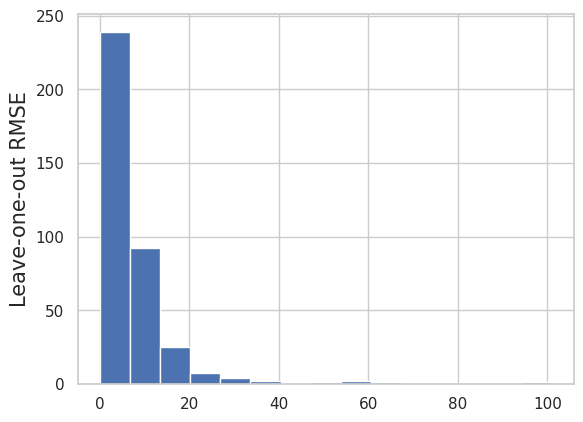

In [60]:
plt.hist(lasso_tree_rmse, bins = 15);
plt.ylabel('Leave-one-out RMSE', fontsize=15);

The coefficients in the Lasso regression model indicate the influence of each feature on the model's predictions. Larger coefficients mean that a feature has a stronger impact on predicting the target variable, while smaller coefficients indicate a weaker impact.

For example, a high positive coefficient suggests that changes in that feature have a significant effect on the predicted values, potentially leading to higher RMSE values if the model doesn't capture the relationship accurately. On the other hand, features with coefficients close to zero have little influence on predictions and contribute less to the RMSE values.

By considering the coefficients alongside the histogram, we can understand which features are considered more or less important by the Lasso regression model. This helps us interpret their contribution to the observed distribution of RMSE values.

#### Building a Ridge Regression Model with Cross Validation

In [61]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

In [62]:
# Initialize a list to record the RMSE
ridge_tree_rmse = []

# Create the model object
model = tree.DecisionTreeRegressor()

# Create the leave one out object
loo = LeaveOneOut()

# Loop over all splits
for train_index, test_index in loo.split(X):

    x_train2 = X.iloc[train_index,:]
    y_train2 = y.iloc[train_index]

    x_test2 = X.iloc[test_index,:]
    y_test2 = y.iloc[test_index]

    # Do the cross validation
    ridgecv = RidgeCV(alphas = alphas, cv = 5, scoring = 'neg_mean_squared_error')
    ridgecv.fit(x_train2, y_train2)
    
    
    # Get the best value of alpha
    ridge_reg = Ridge(alpha = ridgecv.alpha_).fit(x_train2, y_train2)

    # Predict the left out value
    ridge_y_prediction = ridge_reg.predict(x_test2)

    # Record the RMSE
    ridge_tree_rmse.append(mean_squared_error(y_test2, ridge_y_prediction, squared=False))

In [63]:
coefficients = ridge_reg.coef_.round(3)
coefficients = np.insert(coefficients, 0, ridge_reg.intercept_.round(3))

variables = X.columns
variables = np.insert(variables, 0, 'intercept')

pd.DataFrame(data = coefficients, index = variables, columns = ['Estimated Coefficient'])

,Estimated Coefficient
intercept,14.302
HUD_unit_occupancy_rate,-0.877
average_Jan_temperature,0.510
average_summer_temperature,0.165
census_region,3.079
city_or_urban,0.348
gini_coefficient_2016,0.369
high_housing_density,-1.067
house_price_index_2009,1.146
log_median_rent,3.200


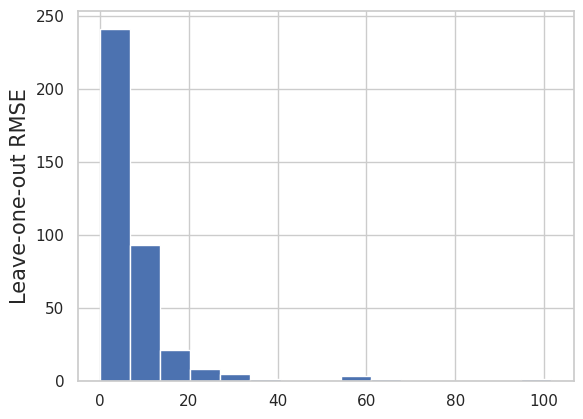

In [64]:
plt.hist(ridge_tree_rmse, bins = 15);
plt.ylabel('Leave-one-out RMSE', fontsize=15);

When comparing the Ridge regression model with the Lasso regression model, we find similarities and differences in the coefficients. The intercept term is comparable, indicating a similar starting point. Certain features, like census_region, city_or_urban, and house_price_index_2009, have consistent influence in both models. However, there are notable differences for features such as HUD_unit_occupancy_rate, high_housing_density, and share_overcrowded_units_2016, which have larger coefficients in Ridge regression, suggesting greater importance in the presence of multicollinearity. Overall, Ridge regression has a smoother regularization effect with fewer zero coefficients, assigning significance to more features compared to Lasso regression.

#### Building an XGB model with Cross Validation

In [65]:
model_xgb = xgb.XGBRegressor(objective="reg:squarederror")

In [66]:
model_xgb.fit(x_train2, y_train2)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [67]:
y_pred_xgb = model_xgb.predict(x_test2)

In [68]:
# Values of tree depth to test
parms = np.arange(1,10)
# Define the set of parameters to tune (just tree depth)
tuned_parameters = [{"max_depth": parms}]
# Specify the number of folds
n_folds = 5

In [69]:
# Initialize a list to record the RMSE
xgb_tree_rmse = []

# Create the model object
model = tree.DecisionTreeRegressor()

# Create the leave one out object
loo = LeaveOneOut()

# Loop over all splits
for train_index, test_index in loo.split(X):

    x_train2 = X.iloc[train_index,:]
    y_train2 = y.iloc[train_index]

    x_test2 = X.iloc[test_index,:]
    y_test2 = y.iloc[test_index]

    # Do the cross validation
    model_xgb = xgb.XGBRegressor(objective="reg:squarederror")
   
    # Get the best value of alpha
    model_xgb.fit(x_train2, y_train2)

    # Predict the left out value
    y_pred_xgb = model_xgb.predict(x_test2)

    # Record the RMSE
    xgb_tree_rmse.append(mean_squared_error(y_test2, y_pred_xgb, squared=False))

In [70]:
# Train your XGBoost model
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train2, y_train2)

# Retrieve feature importance scores
importance_scores = model_xgb.feature_importances_
variables = X.columns

# Create a DataFrame to display the feature importance scores
df_importance = pd.DataFrame(data=importance_scores, index=variables, columns=['Importance Score'])
df_importance = df_importance.sort_values(by='Importance Score', ascending=False)

# Display the DataFrame
print(df_importance)

                                            Importance Score
census_region                                       0.445544
share_HUD_units                                     0.116784
share_renters_2016                                  0.090594
percent_population_0_19                             0.044094
total_Jan_precipitation                             0.037454
share_overcrowded_units_2016                        0.035626
proportion_one_person_households                    0.022984
share_built_before_1940                             0.021039
log_median_rent                                     0.020097
gini_coefficient_2016                               0.019043
percent_population_65_plus                          0.016680
percentage_excessive_drinking                       0.016117
city_or_urban                                       0.011426
rate_unemployment                                   0.008848
utility_costs                                       0.007808
percent_black           

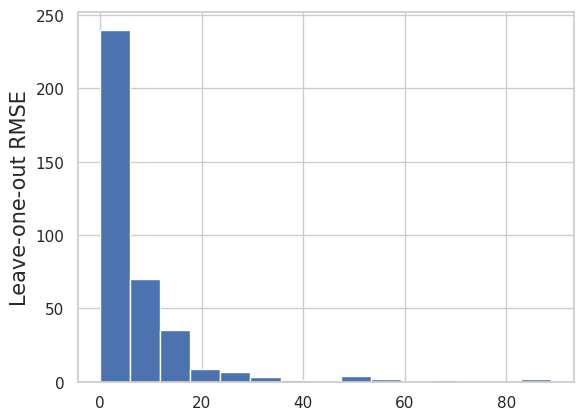

In [71]:
plt.hist(xgb_tree_rmse, bins = 15);
plt.ylabel('Leave-one-out RMSE', fontsize=15);

The importance scores obtained from the XGBoost (Extreme Gradient Boosting) model provide insights into the relative contribution of each feature to the model's predictions. Among the features, "census_region" emerges as the most influential, followed by "share_HUD_units," "share_renters_2016," "percent_population_0_19," and "total_Jan_precipitation," which also exhibit significant importance. Conversely, the feature "suburban" appears to have minimal impact on the predictions, as indicated by its low importance score. Notably, all features have non-zero importance scores, implying that each feature contributes to the model's decision-making process to some extent. By considering these importance scores and the corresponding feature names, valuable insights can be gained regarding the features that hold greater importance in the XGBoost model and their contributions to the overall predictive performance.

In [72]:
# Lasso Regression
lasso_rmse = mean_squared_error(y_test2, lasso_y_prediction) ** 0.5

# Ridge Regression
ridge_rmse = mean_squared_error(y_test2, ridge_y_prediction) ** 0.5

# XGBoost Regression
xgb_rmse = mean_squared_error(y_test2, y_pred_xgb) ** 0.5

print("Lasso Regression - RMSE:", lasso_rmse)
print("Ridge Regression - RMSE:", ridge_rmse)
print("XGBoost Regression - RMSE:", xgb_rmse)

Lasso Regression - RMSE: 5.160132773787399
Ridge Regression - RMSE: 5.939773313525951
XGBoost Regression - RMSE: 2.2076720622048427


Here we can see that the XGBoost Regression model has the lowest RMSE of 2.207, followed by the Lasso Regression model with an RMSE of 5.160, and the Ridge Regression model with an RMSE of 5.940.

Lower RMSE values indicate better model performance, as they indicate smaller deviations between the predicted values and the actual values. Therefore, in terms of RMSE, the XGBoost Regression model seems to outperform the other two models.

## Conclusion

In conclusion, our project aims to understand homelessness in the United States using data science methodology. We seek to provide valuable insights by exploring alternative modeling approaches and examining the relationship between predictor variables, including geographical region, and homelessness rates. By analyzing coefficients and importance scores from models such as Lasso regression, Ridge regression, and XGBoost, we gain insights into the effectiveness of incorporating regional differences and interactions. Our findings contribute to ongoing efforts to address and prevent homelessness in the U.S., supporting HUD's objectives and providing valuable information for developing accurate predictive models.